In [1]:
import numpy as np
import pandas as pd
import os

### Data Preparation

In [2]:
# Find absolute path of ./data/train
# root_path = os.path.abspath(os.path.dirname(__file__))
root_path = os.path.abspath(os.getcwd())
train_path = os.path.join(root_path, "data/train")

In [3]:
file_ids = ['1', '2', '3', '4', '6', '7', '8', '9', '10', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']
for file_id in file_ids:
    globals()[f'run_data_{file_id}'] = pd.read_parquet(os.path.join(train_path, f"run_data_{file_id}.parquet"))
    globals()[f'incoming_run_data_{file_id}'] = pd.read_parquet(os.path.join(train_path, f"incoming_run_data_{file_id}.parquet"))
    globals()[f'metrology_data_{file_id}'] = pd.read_parquet(os.path.join(train_path, f"metrology_data{file_id}.parquet"))

### Basic Properties

#### Tool ID
* A single and unique Tool ID for each run/incoming run file
* Corresponding run/incoming run files share the same Tool ID

In [45]:
unique_tools = set()
for file_id in file_ids:
    unique_tool_run = globals()[f'run_data_{file_id}']['Tool ID'].unique()
    unique_tool_incoming_run = globals()[f'incoming_run_data_{file_id}']['Tool ID'].unique()
    print(unique_tool_run == unique_tool_incoming_run)

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


#### Run IDs


In [57]:
for file_id in file_ids:
    run_data = globals()[f'run_data_{file_id}']
    incoming_run_data = globals()[f'incoming_run_data_{file_id}']
    run_ids_run = run_data['Run ID']
    unique_run_ids_run = set(run_ids_run.unique())
    run_ids_incoming_run = incoming_run_data['Run ID']
    unique_run_ids_incoming = set(run_ids_incoming_run.unique())
    metrology_data = globals()[f'metrology_data_{file_id}']
    run_ids_metrology = metrology_data['Run ID']
    unique_run_ids_metrology = set(run_ids_metrology.unique())

    print(file_id)
    print(len(unique_run_ids_run))
    print(len(run_ids_run))
    print(len(run_ids_incoming_run))
    print(len(run_ids_metrology))
    print(unique_run_ids_run == unique_run_ids_incoming == unique_run_ids_metrology)
    print()

1
225
2235645
4469164
11025
True

2
225
2231955
4402908
11025
True

3
225
2235450
4616887
11025
True

4
225
2241630
4477282
11025
True

6
225
2224380
4663135
11025
True

7
225
2248140
4440628
11025
True

8
225
2244840
4557355
11025
True

9
225
2253105
4500365
11025
True

10
180
1798890
3664211
8820
True

51
225
2233815
4565186
11025
True

52
225
2251365
4599790
11025
True

53
225
2241630
4456946
11025
True

54
225
2232780
4528655
11025
True

55
180
1795215
3607508
8820
True

56
225
2219490
4528286
11025
True

57
225
2244480
4318858
11025
True

58
225
2246790
4489500
11025
True

59
225
2249430
4422014
11025
True

60
180
1791720
3587828
8820
True



#### Sensor Names

In [4]:
print(run_data_1['Sensor Name'].unique())
for file_id in file_ids:
    run_data = globals()[f'run_data_{file_id}']
    print(run_data['Sensor Name'].unique() == run_data_1['Sensor Name'].unique())

['Sensor_A' 'Sensor_B' 'Sensor_C' 'Sensor_D' 'Sensor_E' 'Sensor_F'
 'Sensor_G' 'Sensor_H' 'Sensor_I' 'Sensor_J' 'Sensor_K' 'Sensor_L'
 'Sensor_M' 'Sensor_N' 'Sensor_O']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  

In [65]:
print(incoming_run_data_1['Sensor Name'].unique())
for file_id in file_ids:
    incoming_run_data = globals()[f'incoming_run_data_{file_id}']
    print(incoming_run_data['Sensor Name'].unique() == incoming_run_data_1['Sensor Name'].unique())

['Sensor_1' 'Sensor_10' 'Sensor_11' 'Sensor_12' 'Sensor_13' 'Sensor_14'
 'Sensor_15' 'Sensor_16' 'Sensor_17' 'Sensor_18' 'Sensor_19' 'Sensor_2'
 'Sensor_20' 'Sensor_21' 'Sensor_22' 'Sensor_23' 'Sensor_24' 'Sensor_25'
 'Sensor_26' 'Sensor_27' 'Sensor_28' 'Sensor_29' 'Sensor_3' 'Sensor_30'
 'Sensor_31' 'Sensor_32' 'Sensor_33' 'Sensor_34' 'Sensor_35' 'Sensor_36'
 'Sensor_37' 'Sensor_38' 'Sensor_39' 'Sensor_4' 'Sensor_40' 'Sensor_41'
 'Sensor_5' 'Sensor_6' 'Sensor_7' 'Sensor_8' 'Sensor_9']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True 

In [66]:
print(run_data_1.head(5))

                                Tool ID Run Start Time        Run End Time  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   

                                 Run ID                          Process Step  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   

   Consumable Life Step ID                  

In [68]:
print(run_data_1['Consumable Life'].nunique())

225


In [69]:
print(incoming_run_data_1.head(5))

                                Tool ID Run Start Time        Run End Time  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   

                                 Run ID                          Process Step  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   

  Step ID                    Time Stamp Sens

#### Process Step

* All run_data file entries share the same `Process Step` (intuitively since run_data focuses on the specific current process).
* All incoming_run_data file entries also share the same `Process Step`.

In [10]:
unique_processes = set()
for file_id in file_ids:
    run_data = globals()[f'run_data_{file_id}']
    unique_processes.add(run_data['Process Step'].nunique())
    unique_processes.add(run_data['Process Step'].unique()[0])
print(unique_processes)

{1, '22c8716b-1c14-525a-8c0a-0473ec7aa99e'}


In [13]:
unique_processes = set()
for file_id in file_ids:
    incoming_run_data = globals()[f'incoming_run_data_{file_id}']
    unique_processes.add(incoming_run_data['Process Step'].nunique())
    unique_processes.add(incoming_run_data['Process Step'].unique()[0])
print(unique_processes)

{1, '22c8716b-1c14-525a-8c0a-0473ec7aa99e'}


#### Run Start/End

*

In [15]:
for file_id in file_ids:
    run_data = globals()[f'run_data_{file_id}']
    incoming_run_data = globals()[f'incoming_run_data_{file_id}']
    print(run_data['Run Start Time'].nunique())

225
225
225
225
225
225
225
225
180
225
225
225
225
180
225
225
225
225
180


In [27]:
print(run_data_1.shape) # 2235645
print(run_data_1.groupby(run_data_1['Run Start Time']).size())

(2235645, 10)
Run Start Time
2024-01-01 00:00:00    10830
2024-01-01 00:17:35     8940
2024-01-01 00:52:45    10395
2024-01-01 01:10:20     9150
2024-01-01 01:27:55    10755
                       ...  
2024-01-04 03:27:55    10050
2024-01-04 03:45:30    10995
2024-01-04 04:03:05    10260
2024-01-04 04:20:40    10545
2024-01-04 04:38:15    10260
Length: 225, dtype: int64


In [28]:
print(run_data_2.groupby(run_data_1['Run Start Time']).size())

Run Start Time
2024-01-01 00:00:00     8880
2024-01-01 00:17:35     1845
2024-01-01 00:52:45    10395
2024-01-01 01:10:20     9150
2024-01-01 01:27:55    10755
                       ...  
2024-01-04 03:10:20     9015
2024-01-04 03:27:55    10050
2024-01-04 03:45:30    10995
2024-01-04 04:03:05    10260
2024-01-04 04:20:40     6390
Length: 224, dtype: int64


## Feature Engineering

### Initialization

In [130]:
sample_run_data = run_data_1
sample_incoming_run_data = incoming_run_data_1

### Column Modifications

#### Drop `Process Step`

In [131]:
sample_run_data = sample_run_data.drop(columns=['Process Step'])
sample_incoming_run_data = sample_incoming_run_data.drop(columns=['Process Step'])

#### Replace `Run End Time` with duration of the run and rename it to `Run Duration`

In [132]:
sample_run_data['Run End Time'] = (sample_run_data['Run End Time'] - sample_run_data['Run Start Time']).dt.total_seconds().astype(int)
sample_run_data.rename(columns={'Run End Time': 'Run Duration'}, inplace=True)
print(sample_run_data.head(5))

                                Tool ID Run Start Time  Run Duration  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01           755   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01           755   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01           755   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01           755   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01           755   

                                 Run ID  Consumable Life Step ID  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_1   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_1   

                     Time Stamp Sensor Name  Sensor Value  
0 2024-01-01 00:00:00.000000000    Sensor_A     -0.061105  
1 2024-01-01 00:00:01.000000002    Sen

#### Replace `Run Start Time` with number representing seconds elapsed since the start of the first run

In [133]:
start_time = sample_run_data['Run Start Time'].min()
sample_run_data['Run Start Time'] = (sample_run_data['Run Start Time'] - start_time).dt.total_seconds().astype(int)

print(sample_run_data.head(5))

                                Tool ID  Run Start Time  Run Duration  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1               0           755   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1               0           755   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1               0           755   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1               0           755   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1               0           755   

                                 Run ID  Consumable Life Step ID  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_1   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_1   

                     Time Stamp Sensor Name  Sensor Value  
0 2024-01-01 00:00:00.000000000    Sensor_A     -0.061105  
1 2024-01-01 00:00:01.000000002 

#### Test if `Time Stamp` is in seconds

In [99]:
second_threshold = 0.0001
start_time = sample_run_data['Time Stamp'].min()
nearest_second = (sample_run_data['Time Stamp'] - start_time).dt.total_seconds().round() * pd.Timedelta(seconds=1) + start_time
deviations = (nearest_second - sample_run_data['Time Stamp']).abs()
print(deviations.max() < pd.Timedelta(seconds=second_threshold))

True


#### Replace `Time Stamp` with seconds elapsed since the start of the first run

In [134]:
sample_run_data['Time Stamp'] = (sample_run_data['Time Stamp'] - start_time).dt.total_seconds().round().astype(int)

#### Replace `Tool ID` with a categorical number

In [135]:
sample_run_data['Tool ID'] = sample_run_data['Tool ID'].astype('category').cat.codes

print(sample_run_data.head(5))

   Tool ID  Run Start Time  Run Duration  \
0        0               0           755   
1        0               0           755   
2        0               0           755   
3        0               0           755   
4        0               0           755   

                                 Run ID  Consumable Life Step ID  Time Stamp  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0           0   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0           1   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_0           2   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_1           3   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4         370.7229  Step_1           4   

  Sensor Name  Sensor Value  
0    Sensor_A     -0.061105  
1    Sensor_A     -0.040894  
2    Sensor_A      0.005357  
3    Sensor_A     -0.029941  
4    Sensor_A     -0.098098  


#### Replace `Run ID`, `Step ID` and `Sensor Name` with a categorical number

In [136]:
sample_run_data['Run ID'] = sample_run_data['Run ID'].astype('category').cat.codes
sample_run_data['Step ID'] = sample_run_data['Step ID'].astype('category').cat.codes
sample_run_data['Sensor Name'] = sample_run_data['Sensor Name'].astype('category').cat.codes

print(sample_run_data.head(5))

   Tool ID  Run Start Time  Run Duration  Run ID  Consumable Life  Step ID  \
0        0               0           755     100         370.7229        0   
1        0               0           755     100         370.7229        0   
2        0               0           755     100         370.7229        0   
3        0               0           755     100         370.7229        1   
4        0               0           755     100         370.7229        1   

   Time Stamp  Sensor Name  Sensor Value  
0           0            0     -0.061105  
1           1            0     -0.040894  
2           2            0      0.005357  
3           3            0     -0.029941  
4           4            0     -0.098098  


### Column Collinearity (VIF)

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data['feature'] = dataframe.columns
    vif_data['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

print(calculate_vif(sample_run_data[['Run Start Time', 'Run Duration', 'Run ID', 'Consumable Life', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']]))

           feature            VIF
0   Run Start Time  213500.062435
1     Run Duration      20.534374
2           Run ID       1.008930
3  Consumable Life       1.001604
4          Step ID       1.238203
5       Time Stamp  213500.924212
6      Sensor Name       1.000002
7     Sensor Value       1.000005


Correlation between 'Run Start Time' and 'Time Stamp': 0.9999970999


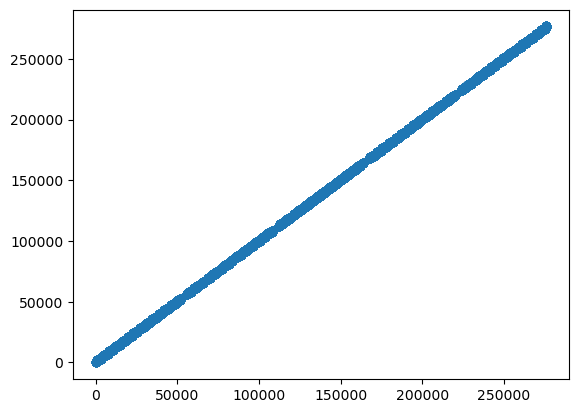

In [146]:
import matplotlib.pyplot as plt
plt.scatter(sample_run_data['Run Start Time'], sample_run_data['Time Stamp'], alpha=0.1)

# Calculate the correlation coefficient
correlation = sample_run_data['Run Start Time'].corr(sample_run_data['Time Stamp'])
print(f"Correlation between 'Run Start Time' and 'Time Stamp': {correlation:.10f}")

#### Possible to remove `Time Stamp` and `Run Duration`

In [164]:
print(calculate_vif(sample_run_data[['Run Start Time', 'Run ID', 'Consumable Life', 'Step ID', 'Sensor Name', 'Sensor Value']]))

           feature       VIF
0   Run Start Time  3.267035
1           Run ID  3.298534
2  Consumable Life  4.159949
3          Step ID  4.919090
4      Sensor Name  3.150238
5     Sensor Value  1.000046


In [165]:
# `Time Stamp` is almost y=x
print(sample_run_data['Time Stamp'].corr(pd.Series(np.arange(len(sample_run_data['Time Stamp'])))))

0.9998895347821206
